In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import json
from tensorflow.keras.metrics import MeanIoU, Recall, Precision, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
learning_rate = 0.0001
# from tensorflow.keras.metrics import DiceCoefficient

In [ ]:
from tensorflow.keras.metrics import MeanIoU, Recall, Precision, BinaryAccuracy

In [ ]:
# def dice_coefficient(y_true, y_pred):
#     intersection = tf.reduce_sum(y_true * y_pred, axis=(1, 2, 3))
#     union = tf.reduce_sum(y_true + y_pred, axis=(1, 2, 3))
#     return (2.0 * intersection + 1e-5) / (union + 1e-5)

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Dataset/Combined_dataset/train'
image_path = TRAIN_PATH + '/image'
train_images = 0

for path in tqdm(os.listdir(image_path)):
    # check if current path is a file
    if os.path.isfile(os.path.join(image_path, path)):
        train_images += 1

print('File count for train:', train_images)

100%|██████████| 2532/2532 [00:01<00:00, 1737.22it/s]

File count for train: 2532


In [ ]:
#Randomly Selecting 10% images from training for testing and putting in X_train and Y_train


# test_numbers = []
# train_numbers = []
# my_dict = {}

# start_key = 1
# end_key = train_images

# # Populate the dictionary with keys and values set to 0
# for key in range(start_key, end_key + 1):
#     my_dict[key] = 0

# for i in range (0, int(0.1*train_images)):
#     random_integer = random.randint(1, train_images)
#     test_numbers.append(random_integer)
#     my_dict[random_integer] = 1

# for key in my_dict:
#     if my_dict[key] == 0:
#         my_dict[key] = 1
#         train_numbers.append(key)

# l = [key for key, value in my_dict.items() if value == 0]
# print("key with 0 value is ", len(l))

# test_images = len(test_numbers)
# total_train_images = len(train_numbers)
# print("test Images :-> ", test_images)
# print("train Images :-> ", total_train_images)


key with 0 value is  0
test Images :->  253
train Images :->  2287


In [ ]:
# IMG_HEIGHT = 256
# IMG_WIDTH = 256
# IMG_CHANNELS = 1 #(since the input images are in grayscale)

# #Preparing testing images in X_test and Y_test
# X_test = np.zeros((test_images, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
# Y_test = np.zeros((test_images, IMG_HEIGHT, IMG_WIDTH), dtype=bool)

# with open('/content/drive/MyDrive/Dataset/test_numbers.json', 'r') as file:
#     test_numbers = json.load(file)

# for i in tqdm(range(0, test_images)):
#   img = imread(TRAIN_PATH + '/image/' + str(test_numbers[i]) + '.png')[:, :]
#   img_mask = imread(TRAIN_PATH + '/mask/' + str(test_numbers[i]) + '.png')[:, :]
#   img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   img_mask = resize(img_mask, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   X_test[i] = img
#   Y_test[i] = img_mask

# np.save('/content/drive/MyDrive/Dataset/X_test256.npy', X_test)
# np.save('/content/drive/MyDrive/Dataset/Y_test256.npy', Y_test)

100%|██████████| 253/253 [00:18<00:00, 13.69it/s]


In [ ]:
print(test_numbers[16])

38


In [ ]:
# plt.imshow(X_test[16], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.title('Image X_test[3]')
# plt.axis('off')  # Optional to hide axis labels
# plt.show()

In [ ]:
# plt.imshow(Y_test[16], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.title('Image Y_test[3]')
# plt.axis('off')  # Optional to hide axis labels
# plt.show()

In [ ]:
# # Creating training images and mask
# X_train = np.zeros((total_train_images, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
# Y_train = np.zeros((total_train_images, IMG_HEIGHT, IMG_WIDTH), dtype=bool)

# with open('/content/drive/MyDrive/Dataset/train_numbers.json', 'r') as file:
#     train_numbers = json.load(file)

# for i in tqdm(range(0,total_train_images)):
#   img = imread(TRAIN_PATH + '/image/' + str(train_numbers[i]) + '.png')[:, :]
#   img_mask = imread(TRAIN_PATH + '/mask/' + str(train_numbers[i]) + '.png')[:, :]
#   img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   img_mask = resize(img_mask, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   X_train[i] = img
#   Y_train[i] = img_mask


# np.save('/content/drive/MyDrive/Dataset/X_train256.npy', X_train)
# np.save('/content/drive/MyDrive/Dataset/Y_train256.npy', Y_train)

100%|██████████| 2287/2287 [01:32<00:00, 24.82it/s]


In [ ]:
# plt.imshow(X_train[4], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.title('Image X_train[4]')
# plt.axis('off')  # Optional to hide axis labels
# plt.show()

In [ ]:
# plt.imshow(Y_train[4], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.title('Image Y_train[3]')
# plt.axis('off')  # Optional to hide axis labels
# plt.show()

In [ ]:
# with open('/content/drive/MyDrive/Dataset/test_numbers.json', 'w') as file:
#     # Use json.dump() to write the list to the file
#     json.dump(test_numbers, file)

In [ ]:
# with open('/content/drive/MyDrive/Dataset/train_numbers.json', 'w') as file:
#     # Use json.dump() to write the list to the file
#     json.dump(train_numbers, file)

In [ ]:
# TEST_PATH = '/content/drive/MyDrive/Dataset/Combined_dataset/test'
# test_images = 0
# # Iterate directory
# for path in tqdm(os.listdir(TEST_PATH)):
#   # check if current path is a file
#   if os.path.isfile(os.path.join(TEST_PATH, path)):
#       test_images += 1
# print('File count for test:', test_images)

100%|██████████| 833/833 [00:00<00:00, 2775.73it/s]

File count for test: 832


In [ ]:
# # defining the dimension of the input images
# IMG_HEIGHT = 128
# IMG_WIDTH = 128
# IMG_CHANNELS = 1 #(since the input images are in grayscale)

# X_train = np.zeros((train_images, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
# Y_train = np.zeros((train_images, IMG_HEIGHT, IMG_WIDTH), dtype=bool)
# # print(X_train.shape)

# # Keeping all the training images pixels in X_train and mask in Y_train
# for i in tqdm(range(0, train_images)):
#   img = imread(TRAIN_PATH + '/image/' + str(i+1) + '.png')[:, :]
#   img_mask = imread(TRAIN_PATH + '/mask/' + str(i+1) + '.png')[:, :]
#   img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   img_mask = resize(img_mask, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   X_train[i] = img
#   Y_train[i] = img_mask

100%|██████████| 2532/2532 [25:27<00:00,  1.66it/s]


In [ ]:
# #test_images
# X_test = np.zeros((test_images, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
# sizes_test = []
# for i in tqdm(range (0, test_images)):
#   img = imread(TEST_PATH + '/' + str(i+1) + '.png')[:, :]
#   sizes_test.append([img.shape[0], img.shape[1]])
#   img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#   X_test[i] = img


100%|██████████| 832/832 [09:09<00:00,  1.51it/s]


In [ ]:
# import tensorflow as tf

def dice_coefficient(y_true, y_pred):
    smooth = 1e-5
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)


In [ ]:
tf.keras.metrics.dice_coefficient = dice_coefficient

In [ ]:
X_train = np.load('/content/drive/MyDrive/Dataset/X_train.npy')
Y_train = np.load('/content/drive/MyDrive/Dataset/Y_train.npy')

plt.imshow(X_train[4], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Image X_train[4]')
plt.axis('off')  # Optional to hide axis labels
plt.show()

In [ ]:
print(X_train.shape)

In [ ]:
dice_metric = tf.keras.metrics.Mean(name='dice_coefficient')
tf.keras.metrics.dice_coefficient = dice_metric


In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/best_model.h5')

In [ ]:

IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1
X_train = np.load('/content/drive/MyDrive/Dataset/X_train.npy')
Y_train = np.load('/content/drive/MyDrive/Dataset/Y_train.npy')
#Model Building
seed = 42
np.random.seed = seed
# 1) Creating the input layer. The input layer are the images of 128*128 size and channel = 1
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

# 2) Defining the Convo Layers
  ## Conv2D( No. of filters, size of filters or kernel size, activation type, how to initialise the weights)
     # 'he_normal'--> Normal Distribution centered around 0
     # padding required to keep the size of op = size of ip
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs) # layers take only floating point, the initilaised weights are already between 0 and 1, but do convert the input image pixels in floating point

# LAYER 1 #
 #Conv1
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding= 'same')(s)
 #Dropout after c1
c1 = tf.keras.layers.Dropout(0.1)(c1)
 # Conv2
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding= 'same')(c1)
#Applying MaxPooling of (2,2)
p1 = tf.keras.layers.MaxPooling2D(2,2)(c1)

# LAYER 2 #
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D(2,2)(c2)

# LAYER 3 #
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D(2,2)(c3)

# LAYER 4 #
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(c4)


# LAYER 5 #
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = 'relu', kernel_initializer='he_normal', padding='same')(c5)

#-------------#
# Expansion Path #

# Conv2DTranspose --> Upscales the images
# Conv2D ----> Downscales the images
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation= 'relu', kernel_initializer= 'he_normal', padding= 'same')(u6)
c6 = tf. keras.layers.Dropout (0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)


u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras. layers. concatenate ([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf. keras.layers.Dropout (0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf. keras.layers .Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf. keras.layers. concatenate ([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout (0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers. concatenate ([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf. keras.layers. Dropout (0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation= 'sigmoid')(c9)

# model = tf.keras.Model(inputs= [inputs], outputs= [outputs])

# Loading the previous model from checkpoint
model = tf.keras.models.load_model('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/model_for_heart128.h5', custom_objects={'dice_coefficient': dice_coefficient})

with open('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/training_history128.json', 'r') as file:
    results = json.load(file)

number_of_epochs_completed = len(results['loss'])


# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=[
#         'accuracy',  # Binary Accuracy
#         'iou',  # Intersection Over Union (IoU)
#         'recall',  # Sensitivity
#         'precision',
#         tf.keras.metrics.MeanIoU(num_classes=2),
#         dice_metric
#     ]
# )

# model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

model.compile(
    optimizer=Adam(learning_rate),
    loss='binary_crossentropy',
    metrics=[
        BinaryAccuracy(name='accuracy'),  # Binary Accuracy
        MeanIoU(num_classes=2, name='iou'),  # Intersection Over Union (IoU)
        Recall(name='recall'),  # Sensitivity
        Precision(name='precision'),
        dice_coefficient  # Custom dice coefficient function
    ]
)
# model.summary()

# Required callbacks during the training

  # 1) ModelCheckpoint -> Helps to store the model, data, weights if case the training gets stopped in the middle due to error and we dont want to lose the trained model
                # verbose--> To show something on the screen
                # save_best_only -> saves the best until the error occured
                # 'model_for_heart.h5' name of the file where the data gets stored with h5 as the extension
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/model_for_heart128.h5', verbose=1, save_best_only=True)

  #2) EarlyStopping --> stop the epochs when the 'monitored' parameter doesnot change after 'patience' iterations.
                      # Example-> you started training with 100 epochs, but ater 10 epochs, the val_loss starts to remain same.So if for the next
                                  # 2 iterations it remain the same then the training stops. NO NEED TO RUN FOR 100 Epochs.

  # 3) TensorBoard ---> You can visualise the val_loss in terms of epochs. Graphical representation
                        # Visualisation Tool

#                         # logs is the name of the file where the info will be saved
# callbacks = [
#               tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'),
#               tf.keras.callbacks.TensorBoard(log_dir = '/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross'),
#               checkpointer
# ]
                      # logs is the name of the file where the info will be saved
callbacks = [
              tf.keras.callbacks.EarlyStopping(patience = 8, monitor = 'iou'),
              tf.keras.callbacks.TensorBoard(log_dir = '/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again'),
              checkpointer
]

# Saving the accuracy as the model gets trained

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=25, epochs=100, initial_epoch= number_of_epochs_completed, callbacks=callbacks)
model.save('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/unet_model128.h5')


# Saving the data
with open('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/training_history128.json', 'w') as file:
     json.dump(results.history, file)






Epoch 11/100
83/83 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.9900 - iou: 0.4818 - recall: 0.8458 - precision: 0.8743 - dice_coefficient: 0.7806
Epoch 11: val_loss improved from inf to 0.03696, saving model to /content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/model_for_heart128.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


83/83 [==============================] - 386s 5s/step - loss: 0.0264 - accuracy: 0.9900 - iou: 0.4818 - recall: 0.8458 - precision: 0.8743 - dice_coefficient: 0.7806 - val_loss: 0.0370 - val_accuracy: 0.9852 - val_iou: 0.4771 - val_recall: 0.7594 - val_precision: 0.9028 - val_dice_coefficient: 0.3628
Epoch 12/100
83/83 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9910 - iou: 0.4818 - recall: 0.8632 - precision: 0.8858 - dice_coefficient: 0.8049
Epoch 12: val_loss did not improve from 0.03696
83/83 [==============================] - 358s 4s/step - loss: 0.0229 - accuracy: 0.9910 - iou: 0.4818 - recall: 0.8632 - precision: 0.8858 - dice_coefficient: 0.8049 - val_loss: 0.0452 - val_accuracy: 0.9798 - val_iou: 0.4771 - val_recall: 0.6068 - val_precision: 0.9277 - val_dice_coefficient: 0.3282
Epoch 13/100
83/83 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9908 - iou: 0.4818 - recall: 0.8580 - precision: 0.8848 - dice_coefficient: 0.8048


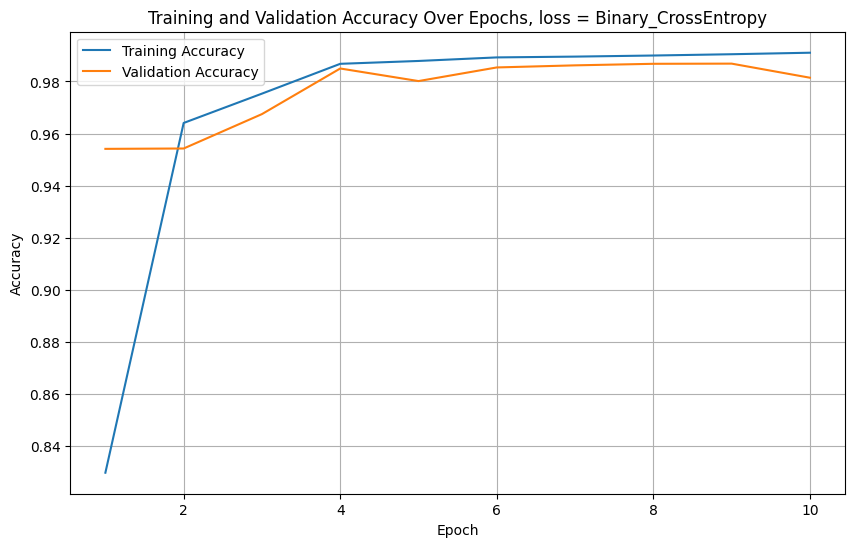

In [ ]:

with open('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/Binay_Again/training_history128.json', 'r') as file:
    results = json.load(file)

training_accuracy = []
validation_accuracy = []
training_accuracy = results['accuracy']
validation_accuracy = results['val_accuracy']
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs, loss = Binary_CrossEntropy')
plt.legend()
plt.grid(True)
# plt.savefig('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/train_val_Vs_epoch.png')
plt.show()



In [ ]:
print(IoU)

[0.48184919357299805, 0.48184922337532043, 0.48184922337532043, 0.48184922337532043, 0.48184919357299805, 0.48184922337532043, 0.48184922337532043, 0.48184922337532043, 0.48184919357299805, 0.48184922337532043]


In [ ]:
number_of_epochs_completed = len(results['loss'])
print(number_of_epochs_completed)

10


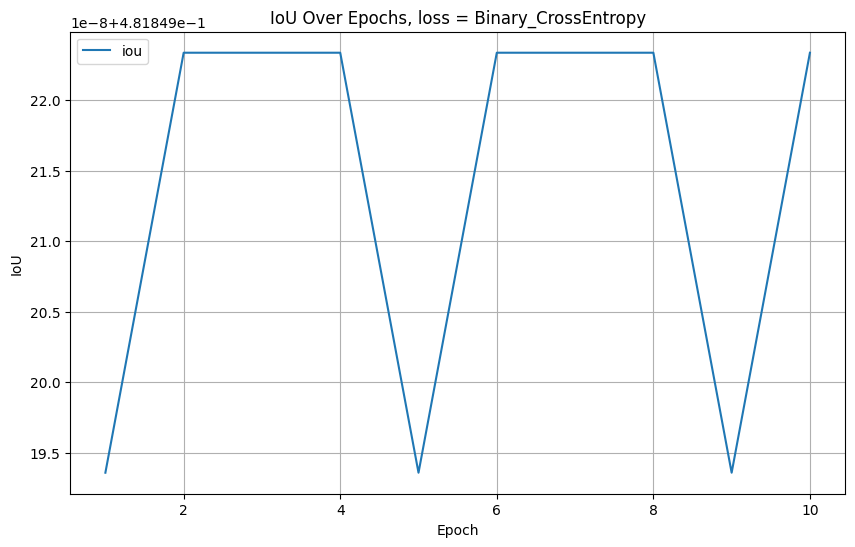

In [ ]:
IoU = []
IoU = results['iou']
# validation_accuracy = results['val_accuracy']
# plt.figure(figsize=(10, 6))
plt.plot(range(1, len(IoU) + 1), IoU, label='iou')
# plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('IoU Over Epochs, loss = Binary_CrossEntropy')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/iou_Vs_epoch.png')
plt.show()


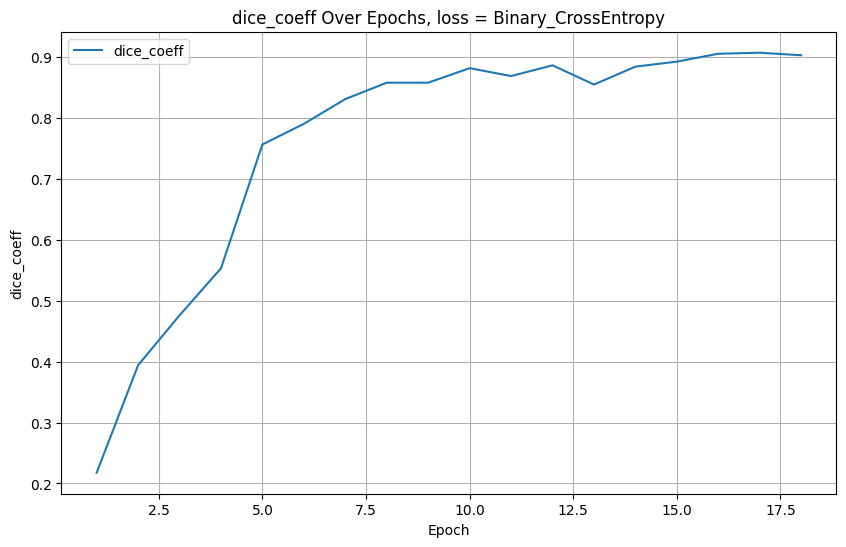

In [ ]:
dice_coeff = []
dice_coeff = results['dice_coefficient']
# validation_accuracy = results['val_accuracy']
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(dice_coeff) + 1), dice_coeff, label='dice_coeff')
# plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('dice_coeff')
plt.title('dice_coeff Over Epochs, loss = Binary_CrossEntropy')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/dice_coeff_Vs_epoch.png')
plt.show()

In [ ]:

#random picking up image to test
idx = random.randint(0, len(X_train))
preds_train = model. predict(X_train[:int(X_train.shape[0])], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9) :], verbose=1)
preds_test = model.predict(X_test, verbose=1)


preds_train_t = (preds_train > 0.5). astype(np.uint8)
# preds_val_t = (preds_val > 0.5). astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



In [ ]:
24 -- 61

In [ ]:
print(X_test[0])

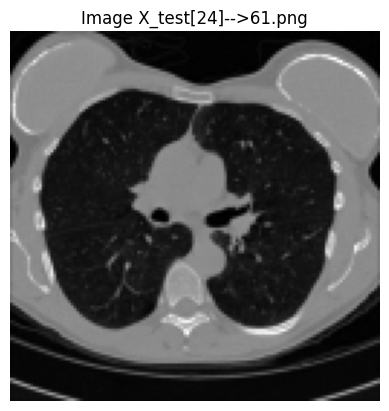

In [ ]:
X_test = np.load('/content/drive/MyDrive/Dataset/X_test.npy')
Y_test = np.load('/content/drive/MyDrive/Dataset/Y_test.npy')

plt.imshow(X_test[24], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.imshow(Y_test[24], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Image X_test[24]-->61.png')
plt.axis('off')  # Optional to hide axis labels
plt.show()


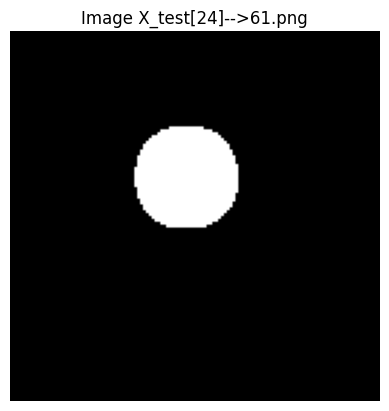

In [ ]:

plt.imshow(Y_test[24], cmap='gray')  # Use 'gray' colormap for grayscale images
# plt.imshow(Y_test[24], cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Image X_test[24]-->61.png')
plt.axis('off')  # Optional to hide axis labels
plt.show()

In [ ]:
print(Y_test[24])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
from keras.utils import get_custom_objects
get_custom_objects().update({'dice_coefficient': dice_coefficient})

In [ ]:
my_model = tf.keras.models.load_model('/content/drive/MyDrive/Project7thSem/Heart_Dataset/UNet_Details/Loss_Changes/Binary_Cross/unet_model.h5')

X_test = np.load('/content/drive/MyDrive/Dataset/X_test.npy')
Y_test = np.load('/content/drive/MyDrive/Dataset/Y_test.npy')
# preds_test = my_model.predict(X_test[24], verbose=1)
pred_mask = my_model.predict(X_test, verbose=1)
# binary_pred_mask = (pred_mask >= 0.5).astype(int)
binary_pred_mask = (pred_mask > 0.5).astype(np.uint8)
# Assuming binary_pred_mask is (253, 128, 128, 1)
binary_pred_mask = binary_pred_mask.squeeze(axis=-1)  # Remove the last dimension
# Now binary_pred_mask should be (253, 128, 128)


8/8 [==============================] - 9s 1s/step


In [ ]:

flat_binary_pred_mask = binary_pred_mask.reshape(-1)
flat_Y_test = Y_test.reshape(-1)

In [ ]:
print(binary_pred_mask.shape)

(253, 128, 128)


In [ ]:
print(Y_test.shape)

(253, 128, 128)


In [ ]:
binary_pred_mask_flat = binary_pred_mask.reshape(-1)
Y_test_flat = Y_test.reshape(-1)

In [ ]:
print(Y_test_flat.shape)

(4145152,)


In [ ]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test_flat, binary_pred_mask_flat))

Accuracy =  0.9949806424468873


In [ ]:
from keras.metrics import MeanIoU
num_classes=2
IOU_keras= MeanIoU(num_classes=num_classes)
IOU_keras.update_state(Y_test_flat, binary_pred_mask_flat)
print("Mean IoU = ",IOU_keras.result().numpy())

Mean IoU =  0.92988265


In [ ]:
print(pred_mask)

In [ ]:

# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt. show()
imshow(np. squeeze(Y_train[ix]))
plt. show()
imshow(np. squeeze(preds_train_t[ix]))
plt. show()
 #Perform a sanity check on some random validation samples
ix = random.randint (0, len (preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()

imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt. show()
imshow(np. squeeze(preds_val_t[ix]))
plt. show()